# FIFA Ranking Takeaways

We are given a dataset from FIFA ranking international teams since 1992. This dataset contains all available FIFA men's international soccer rankings from August 1993 to April 2018. Rankings and points have been scraped from the official FIFA website.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
fifa_ranking = pd.read_csv('C:/Users/hamza/Downloads/Springboard Case Studies/Futbol Case Study/fifa_ranking.csv')

In [3]:
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [4]:
fifa_ranking.head(10)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
5,6,Republic of Ireland,IRL,0.0,54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
6,7,Russia,RUS,0.0,52,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
7,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
8,9,Norway,NOR,0.0,49,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
9,10,Denmark,DEN,0.0,51,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [5]:
fifa_ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [6]:
fifa_ranking.rank_date.unique()

array(['1993-08-08', '1993-09-23', '1993-10-22', '1993-11-19',
       '1993-12-23', '1994-02-15', '1994-03-15', '1994-04-19',
       '1994-05-17', '1994-06-14', '1994-07-21', '1994-09-13',
       '1994-10-25', '1994-11-22', '1994-12-20', '1995-02-20',
       '1995-04-19', '1995-05-16', '1995-06-13', '1995-07-25',
       '1995-08-22', '1995-09-19', '1995-10-17', '1995-11-21',
       '1995-12-19', '1996-01-24', '1996-02-21', '1996-04-24',
       '1996-05-22', '1996-07-03', '1996-08-28', '1996-09-25',
       '1996-10-23', '1996-11-20', '1996-12-18', '1997-02-27',
       '1997-04-09', '1997-05-14', '1997-06-18', '1997-07-16',
       '1997-08-20', '1997-09-17', '1997-10-17', '1997-11-19',
       '1997-12-23', '1998-02-18', '1998-03-18', '1998-04-22',
       '1998-05-20', '1998-07-15', '1998-08-19', '1998-09-16',
       '1998-10-21', '1998-11-18', '1998-12-23', '1999-01-27',
       '1999-02-24', '1999-03-24', '1999-04-21', '1999-05-19',
       '1999-06-16', '1999-07-21', '1999-08-18', '1999-

Filtering data with country_full == 'Saudi Arabia'

In [7]:
rank_date_filter = fifa_ranking.country_full == 'Saudi Arabia'
df_Saudi = fifa_ranking[rank_date_filter].copy().reset_index(drop=True)
df_Saudi.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,44,Saudi Arabia,KSA,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,1993-08-08
1,44,Saudi Arabia,KSA,0.0,34,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,1993-09-23
2,46,Saudi Arabia,KSA,0.0,34,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,1993-10-22
3,38,Saudi Arabia,KSA,0.0,34,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,1993-11-19
4,38,Saudi Arabia,KSA,0.0,38,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,1993-12-23


In [8]:
#Drop the total_point
point_filter = df_Saudi['total_points'] != 0
del_index = df_Saudi[point_filter].index[0]
df_Saudi.drop(df_Saudi.index[:del_index],inplace=True)

#Reset Index
df_Saudi= df_Saudi.reset_index(drop=True)
df_Saudi.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,87,Saudi Arabia,KSA,372.33,354,5,141.49,141.49,211.90,105.95,228.45,68.53,281.78,56.36,AFC,2011-08-24
1,97,Saudi Arabia,KSA,359.41,372,-10,138.11,138.11,200.26,100.13,205.37,61.61,297.81,59.56,AFC,2011-09-21
2,98,Saudi Arabia,KSA,340.69,359,-1,122.26,122.26,190.10,95.05,212.75,63.82,297.81,59.56,AFC,2011-10-19
3,98,Saudi Arabia,KSA,361.23,341,0,142.89,142.89,187.64,93.82,212.62,63.79,303.63,60.73,AFC,2011-11-23
4,96,Saudi Arabia,KSA,363.11,361,2,153.35,153.35,162.90,81.45,212.62,63.79,322.61,64.52,AFC,2011-12-21


In [9]:
#Define average function and Create new Column assign High-Average-Low string according to funcntion
def take_average():
    average = sum(df_Saudi.total_points)/len(df_Saudi.total_points)
    df_Saudi['point_scale'] = ['High' if (point > average) else 'Average' if (average <= point < (average + 100)) else 'Low' for point in df_Saudi.total_points]
    return average
average = take_average()

#Check total_points vs point_scale
df_Saudi.loc[:10,['total_points','point_scale']]

,total_points,point_scale
0,372.33,Low
1,359.41,Low
2,340.69,Low
3,361.23,Low
4,363.11,Low
5,403.29,Low
6,406.95,Low
7,388.03,Low
8,373.17,Low
9,373.17,Low


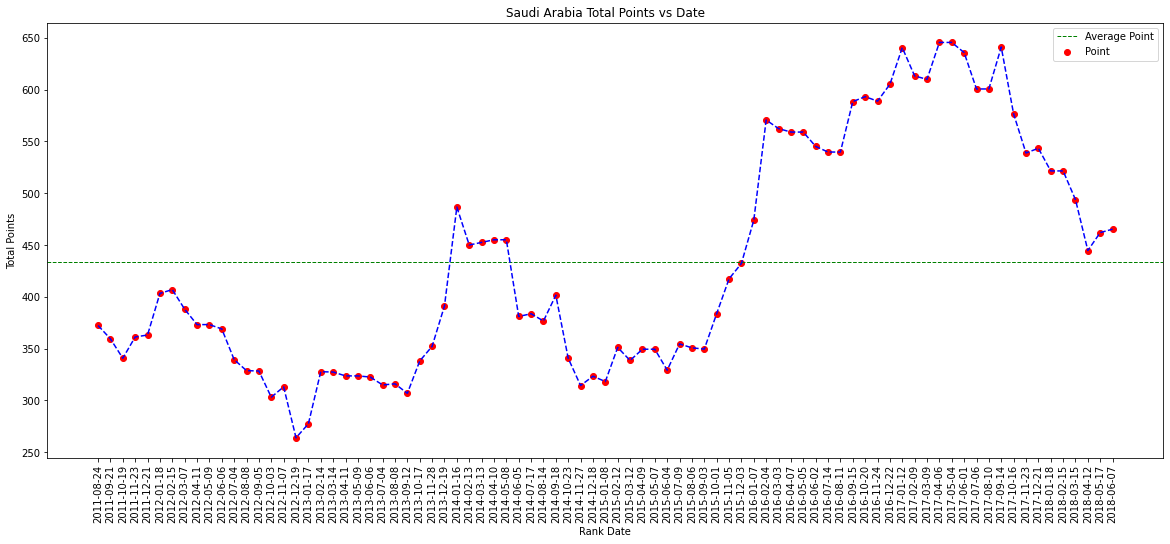

In [14]:
#fig, ax = plt.subplots()
#_ = ax.scatter(x, y, c=x, cmap='plasma')
#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x, p(x), "r-o")


plt.figure(figsize=(20, 8))
plt.scatter(df_Saudi.rank_date,df_Saudi.total_points,color = 'r', label = 'Point')
plt.axhline(average, color='g', linestyle='dashed', linewidth=1,label = 'Average Point')
plt.xlabel('Rank Date')
plt.plot(df_Saudi.rank_date,df_Saudi.total_points,"b--")
plt.xticks(rotation='vertical')
plt.ylabel('Total Points')
plt.title('Saudi Arabia Total Points vs Date')
plt.legend()
plt.show()

It seems Saudi Arabia's points was higher in 2017, in which their football teams have the best performance they have had.